In [4]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [20]:
# Load Trump and Biden tweet datasets 
trump_tweets_file = "archive/hashtag_donaldtrump.csv"
biden_tweets_file = "archive/hashtag_joebiden.csv"

# Define pro-trump and pro-biden hashtags and topics
trump_hashtags = ["#MAGA", "#KAG", "#FourMoreYears", "#SleepyJoe", "#BlacksForTrump", "#Trump2020", "#VoteRed", "#WomenForTrump", "#LatinosForTrump", "#AmericaFirst", "#BuildTheWall"]
biden_hashtags = ["#Biden2020", "#BidenHarris2020", "#VoteBlue", "#NotMyPresident", "#BlueWave2020", "#VoteBiden", "#VoteBlueToSaveAmerica", "#BlacksForBiden", "#WomenForBiden", "#LatinosForBiden"]
topics = ['abortion', 'immigration', 'gun control']

# Create a dictionary to map topics to labels
topic_to_label = {'abortion': 0, 'Abortion': 0,'fetus': 0, 'Fetus': 0,'pro-life': 0, 'pro-choice': 0, 'babies': 0,
                'immigration': 1, 'immigrant': 1, 'immigrants': 1, 'Immigration': 1, 'Immigrant': 1, 'Immigrants': 1,
                'wall': 1, 'border': 1, 'arms': 2, 'gun': 2, 'bullet': 2, 'Gun': 2, 'guns': 2, 'Guns': 2}

#Trump Dataframe
trump_df = pd.DataFrame()

#Biden Dataframe
biden_df = pd.DataFrame()

def filter_tweets_by_hashtags(tweet_df, hashtags, label):
    # Convert 'tweet' column to string
    tweet_df['tweet'] = tweet_df['tweet'].astype(str)
    
    # Construct a regular expression pattern to match any of the specified hashtags
    pattern = '|'.join([re.escape(tag) for tag in hashtags])
    
    # Filter tweets that contain any of the specified hashtags
    filtered_tweets = tweet_df[tweet_df['tweet'].str.contains(pattern, case=False)]
    
    # Add a new column 'label' with specified label
    filtered_tweets['label'] = label
    
    return filtered_tweets

def label_tweets_by_topic(tweet_df, topics):
    # Initialize a list to store labels for each tweet
    labels = []
    
    # Iterate over each tweet
    for tweet in tweet_df['tweet']:
        # Initialize label to None
        label = None
        
        try:
            # Check if any topic appears in the tweet
            for topic in topics:
                if topic in str(tweet):  # Convert tweet to string
                    # If topic found, assign the corresponding label
                    label = topic_to_label.get(topic)
                    break  # Exit loop once a topic is found
        except TypeError:  # Catch the TypeError exception when tweet is not a string
            label = -1
        
        # If no topic found, assign a default label (e.g., -1)
        if label is None:
            label = -1
        
        # Append the label to the list of labels
        labels.append(label)
    
    # Add a new column 'topic' to the DataFrame
    tweet_df['topic'] = labels
    
    return tweet_df



In [17]:
import pandas as pd
# load in the preprocessed data
merged_df = pd.read_csv('Data/training_data.csv')
merged_df.head()

# trump = 1, biden = 0
# 204182 pro trump tweets
# 85406 pro biden tweets

,tweet_text,score,candidate
0,#ElezioniUsa2020 in stallo. #Biden e #Trump so...,0.0000,1
1,President @realDonaldTrump Wins #Mississippi \...,0.5719,1
2,"""China’s turns on the charm to get its belt an...",-0.3818,1
3,I am sensitive to the fact that he suffers fro...,-0.7709,0
4,@realDonaldTrump : I want to say you (from Fra...,0.8172,0


In [13]:
# This was part of an attempt to train data on just topic and vader score
# This was not used in the training of our final model**
pro_trump = filter_tweets_by_hashtags(merged_df, trump_hashtags, 1)

/var/folders/6h/b3cz5mm52w11znt94brmxql80000gn/T/ipykernel_5537/578802554.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tweets['label'] = label


In [14]:
pro_trump.head()

,tweet_text,score,candidate,tweet,label
0,#ElezioniUsa2020 in stallo. #Biden e #Trump so...,0.0000,1,#ElezioniUsa2020 in stallo. #Biden e #Trump so...,1
1,President @realDonaldTrump Wins #Mississippi \...,0.5719,1,President @realDonaldTrump Wins #Mississippi \...,1
2,"""China’s turns on the charm to get its belt an...",-0.3818,1,"""China’s turns on the charm to get its belt an...",1
4,@realDonaldTrump : I want to say you (from Fra...,0.8172,0,@realDonaldTrump : I want to say you (from Fra...,1
5,@BarackObama I don't know as why I am supporti...,0.9217,1,@BarackObama I don't know as why I am supporti...,1


In [11]:
# Pro-trump and pro-biden hashtags
hashtags = ["#MAGA", "#KAG", "#FourMoreYears", "#SleepyJoe", "#BlacksForTrump", "#Trump2020", "#VoteRed", "#WomenForTrump", "#LatinosForTrump", "#AmericaFirst", "#BuildTheWall", "#Biden2020", "#BidenHarris2020", "#VoteBlue", "#NotMyPresident", "#BlueWave2020", "#VoteBiden", "#VoteBlueToSaveAmerica", "#BlacksForBiden", "#WomenForBiden", "#LatinosForBiden"]

In [18]:
# Remove hashtags from tweet_text column
for hashtag in hashtags:
    merged_df['tweet_text'] = merged_df['tweet_text'].str.replace(hashtag, '')
print(merged_df['tweet_text'][0])

#ElezioniUsa2020 in stallo. #Biden e #Trump sono bloccati in una corsa serrata, mentre continua il conteggio dei voti. Potrebbero servire giorni per avere il risultato finale. Gli ultimi dati aggiornati
  #Usa2020 #ElectionDay
https://t.co/zaZnqYJJyk


In [19]:
# drop duplicates and sanity check
#merged_df.drop_duplicates()
merged_df.head()

# Drop null values
merged_df = merged_df.dropna()

In [24]:
X_train.head()

,tweet_text,score
152366,#TrumpMeltdown #TrumpIsLosing #COVID19 #Trump...,0.0000
118124,🤣 Pretty genius the way #Biden “rigged” this e...,-0.6808
74534,"Carolina Cimenti, jornalista da @GloboNews, fa...",0.0000
185687,"Listen to ""Chris Christie Admits He Was Wrong ...",-0.2263
180473,Chino-Democrat Corporate Conglomerate Party M...,0.1280


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into x and y
y = merged_df['candidate'] 
merged_df = merged_df.drop(columns=['candidate'])
# merged_df = merged_df.drop(columns=['topic']) # Drop label from features

X = merged_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
# Our Model

# Tokenize text
max_words = 1000  # maximum number of words to consider as features
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train['tweet_text'])
sequences = tokenizer.texts_to_sequences(X_train['tweet_text'])
word_index = tokenizer.word_index
maxlen = 280 # max length of a tweet
data_text = pad_sequences(sequences, maxlen=maxlen)

# Add score as an additional feature
features = X_train['score']  

# Define text input
text_input = Input(shape=(maxlen,), name='text_input')
text_embedding = Embedding(max_words, 32, input_length=maxlen)(text_input)
text_flatten = Flatten()(text_embedding)

# Define features input
features_input = Input(shape=(1,), name='features_input')  # Only one feature now

# Concatenate text and features
concatenated = Concatenate()([text_flatten, features_input])

# Dense layers
dense_1 = Dense(64, activation='relu')(concatenated)
dropout = Dropout(0.5)(dense_1)
output = Dense(1, activation='sigmoid')(dropout)

# Define model
model = Model(inputs=[text_input, features_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit({'text_input': data_text, 'features_input': features}, y_train, epochs=5, batch_size=32, validation_split=0.2)


/Users/hughchapin/opt/anaconda3/envs/bigdata/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
5792/5792 ━━━━━━━━━━━━━━━━━━━━ 73s 12ms/step - accuracy: 0.9030 - loss: 0.2282 - val_accuracy: 0.9287 - val_loss: 0.1516
Epoch 2/5
5792/5792 ━━━━━━━━━━━━━━━━━━━━ 69s 12ms/step - accuracy: 0.9326 - loss: 0.1470 - val_accuracy: 0.9323 - val_loss: 0.1401
Epoch 3/5
5792/5792 ━━━━━━━━━━━━━━━━━━━━ 74s 13ms/step - accuracy: 0.9346 - loss: 0.1379 - val_accuracy: 0.9350 - val_loss: 0.1367
Epoch 4/5
5792/5792 ━━━━━━━━━━━━━━━━━━━━ 74s 13ms/step - accuracy: 0.9376 - loss: 0.1314 - val_accuracy: 0.9330 - val_loss: 0.1429
Epoch 5/5
5792/5792 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - accuracy: 0.9402 - loss: 0.1252 - val_accuracy: 0.9351 - val_loss: 0.1356


In [29]:
from sklearn.metrics import classification_report

# Tokenize text for test data
test_sequences = tokenizer.texts_to_sequences(X_test['tweet_text'])
test_data_text = pad_sequences(test_sequences, maxlen=maxlen)  # Ensure maxlen matches the expected input shape of the model

# Get predictions on test data
y_pred = model.predict({'text_input': test_data_text, 'features_input': X_test['score']})

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     17104
           1       0.93      0.99      0.96     40814

    accuracy                           0.94     57918
   macro avg       0.95      0.90      0.92     57918
weighted avg       0.94      0.94      0.93     57918



In [30]:
from sklearn.metrics import confusion_matrix


# Tokenize text for test data
test_sequences = tokenizer.texts_to_sequences(X_test['tweet_text'])
test_data_text = pad_sequences(test_sequences, maxlen=maxlen)

# Get predictions on test data
y_pred = model.predict({'text_input': test_data_text, 'features_input': X_test['score']})

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Confusion Matrix:
[[13886  3218]
 [  455 40359]]


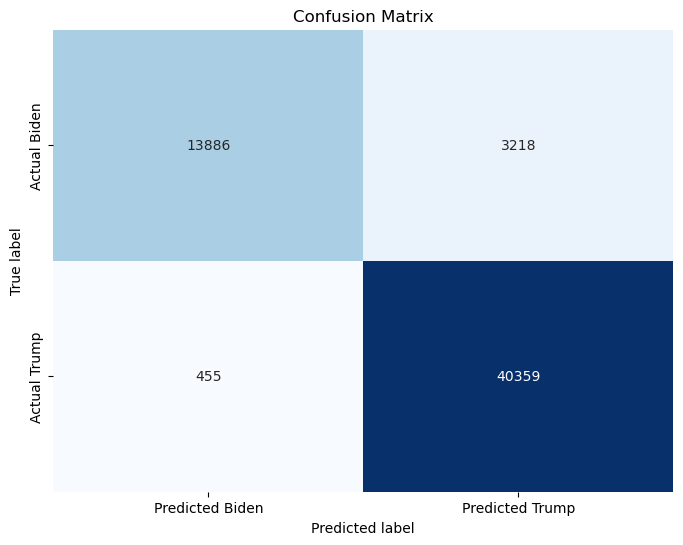

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted Biden", "Predicted Trump"], yticklabels=["Actual Biden", "Actual Trump"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


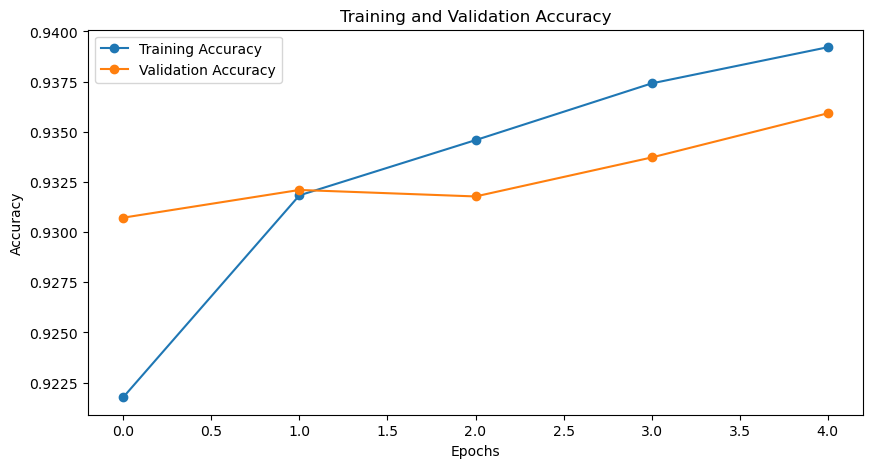

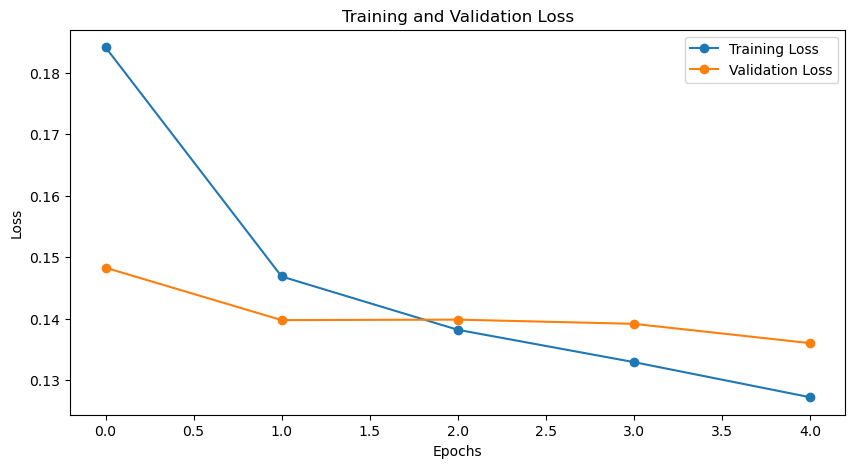

In [87]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [25]:
# Saving our model
model.save("archive/lord_matthias.h5")

In [2]:
from tensorflow.keras.models import load_model
model = load_model("archive/lord_matthias.h5")

2024-05-06 13:52:41.044338: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Read in the larger dataset with tweet, topic, and vader_score (but no pro-trump or biden label)
final_output = pd.read_csv('archive/final_biden_trump.csv')
final_output.head()

,tweet,topic,vader_score
0,@RealCarolJones @charlottesix6 That’s the spec...,2,-0.6351
1,@JasonMillerinDC @nypost I think I'll end on t...,0,-0.4215
2,Seuls les bulletins legos doivent être comptés...,2,0.0000
3,On his first day in office #JoeBiden will use ...,0,-0.8360
4,"This family does... with all our heart, all ou...",2,0.9057


In [22]:
# The next set of cells was a last minute attempt to try and use only topic and vader score as features to predict candidate
# This did not work very well and was not used as our final model
pro_trump = filter_tweets_by_hashtags(final_output, trump_hashtags, 1)
pro_trump.head()
print(pro_trump.shape)

(3417, 4)


/var/folders/6h/b3cz5mm52w11znt94brmxql80000gn/T/ipykernel_5537/2586836164.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tweets['label'] = label


In [28]:
pro_trump.drop_duplicates(inplace=True)
pro_trump['topic'].value_counts()

/var/folders/6h/b3cz5mm52w11znt94brmxql80000gn/T/ipykernel_5537/4040716126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_trump.drop_duplicates(inplace=True)


topic
1    810
2    712
0    246
Name: count, dtype: int64

In [24]:
pro_biden = filter_tweets_by_hashtags(final_output, biden_hashtags, 0)
pro_biden.head()
print(pro_biden.shape)

(2677, 4)


/var/folders/6h/b3cz5mm52w11znt94brmxql80000gn/T/ipykernel_5537/2586836164.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tweets['label'] = label


In [27]:
pro_biden.drop_duplicates(inplace=True)
pro_biden['topic'].value_counts()

/var/folders/6h/b3cz5mm52w11znt94brmxql80000gn/T/ipykernel_5537/689908501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_biden.drop_duplicates(inplace=True)


topic
1    737
2    523
0    218
Name: count, dtype: int64

In [29]:
new_df = pd.concat([pro_biden, pro_trump])

In [34]:
new_df = new_df.sample(frac=1)
new_df.head()

,tweet,topic,vader_score,label
22005,Biden (obama) had the house majority &amp; a 6...,1,0.7651,1
37221,#today #democracy #won #bidenharris2020 #biden...,1,0.0000,0
35124,"Please vote blue I want to have rights, I want...",0,0.2023,0
13514,@realDonaldTrump LIBERAL GUN OWNING NYS LATINA...,2,0.4484,1
6312,#MAGA #Trump2020LandslideVictory #ImmigrationM...,1,-0.4767,1


In [38]:
data = pd.DataFrame()
data = new_df
data.head()

,tweet,topic,vader_score,label
22005,Biden (obama) had the house majority &amp; a 6...,1,0.7651,1
37221,#today #democracy #won #bidenharris2020 #biden...,1,0.0000,0
35124,"Please vote blue I want to have rights, I want...",0,0.2023,0
13514,@realDonaldTrump LIBERAL GUN OWNING NYS LATINA...,2,0.4484,1
6312,#MAGA #Trump2020LandslideVictory #ImmigrationM...,1,-0.4767,1


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Assuming 'data' is your DataFrame
# Assuming 'label' is the target column
# Assuming 'vader_score' and 'topic' are your features

# Step 1: Split the data into features and target variable
X = data[['vader_score', 'topic']]
y = data['label']

# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Define neural network architecture
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=64,  # Adjust batch size
                    validation_split=0.2)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Accuracy:', test_acc)

Epoch 1/100


/Users/hughchapin/opt/anaconda3/envs/bigdata/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5378 - loss: 1.8704 - val_accuracy: 0.5442 - val_loss: 1.4852
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5479 - loss: 1.3902 - val_accuracy: 0.5442 - val_loss: 1.1517
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5344 - loss: 1.0959 - val_accuracy: 0.5442 - val_loss: 0.9522
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5159 - loss: 0.9215 - val_accuracy: 0.5442 - val_loss: 0.8356
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5393 - loss: 0.8167 - val_accuracy: 0.5442 - val_loss: 0.7693
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5357 - loss: 0.7595 - val_accuracy: 0.5442 - val_loss: 0.7326
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5426 - loss: 0.7269 - val_accuracy: 0.5442 - val_loss: 0.7123
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5267 - loss: 0.7116 - val_accuracy: 0.5442 - val_loss: 0.

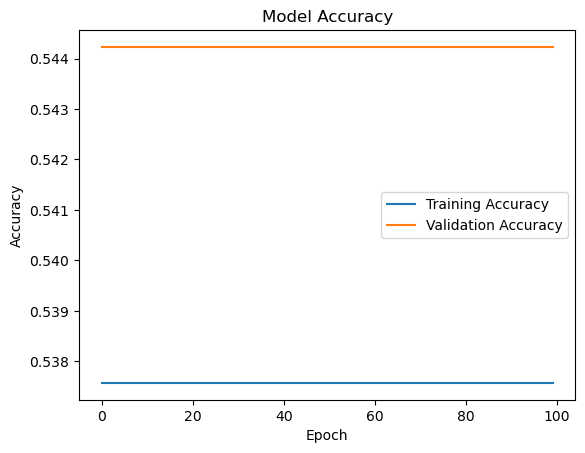

In [49]:
# Step 7: Plotting accuracy history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [88]:
# This next section was running our original model (trained on tweet and vader score)
# We wanted to see if it could classify the larger dataset into pro-trump and pro-biden
# We separated the data into three different topics

# create three new dataframes depending on the topic
# Create separate DataFrames for each topic
abortion_df = final_output[final_output['topic'] == 0].copy()
immigration_df = final_output[final_output['topic'] == 1].copy()
gun_df = final_output[final_output['topic'] == 2].copy()

In [89]:
# Drop the 'topic' column from each DataFrame
abortion_df.drop(columns=['topic'], inplace=True)
immigration_df.drop(columns=['topic'], inplace=True)
gun_df.drop(columns=['topic'], inplace=True)

In [90]:
abortion_df.drop_duplicates(inplace=True)
immigration_df.drop_duplicates(inplace=True)
gun_df.drop_duplicates(inplace=True)

In [91]:
# Tokenize and pad the text data for each topic DataFrame
tokenizer = Tokenizer()
sequences_abortion = tokenizer.texts_to_sequences(abortion_df['tweet'])
data_text_abortion = pad_sequences(sequences_abortion, maxlen=280)

sequences_immigration = tokenizer.texts_to_sequences(immigration_df['tweet'])
data_text_immigration = pad_sequences(sequences_immigration, maxlen=280)

sequences_gun = tokenizer.texts_to_sequences(gun_df['tweet'])
data_text_gun = pad_sequences(sequences_gun, maxlen=280)

# Prepare additional features for each topic DataFrame
features_abortion = abortion_df['vader_score'].values.reshape(-1, 1)
features_immigration = immigration_df['vader_score'].values.reshape(-1, 1)
features_gun = gun_df['vader_score'].values.reshape(-1, 1)

In [92]:
print(gun_df)

                                                   tweet  vader_score
0      @RealCarolJones @charlottesix6 That’s the spec...      -0.6351
2      Seuls les bulletins legos doivent être comptés...       0.0000
4      This family does... with all our heart, all ou...       0.9057
5      @realDonaldTrump He’s using our tax payers dol...      -0.4404
8      El moderador del #Debates2020 debería ser @lcv...       0.0000
...                                                  ...          ...
40833  Ich gehe schlafen und freue mich morgen mit de...       0.0000
40843  @nazirafzal @motherhen56 There are a lot of tr...       0.9215
40846  #TwitterCensorship the #Smokinggun emails of #...      -0.2023
40860  100 reasons to vote for #JoeBiden that don't m...      -0.9337
40863  @DoriToribio Una pregunta \nVeo a #Biden muy m...       0.0000

[11061 rows x 2 columns]


In [93]:
# Generate predictions for each topic DataFrame
predictions_abortion = model.predict({'text_input': data_text_abortion, 'features_input': features_abortion})
predictions_immigration = model.predict({'text_input': data_text_immigration, 'features_input': features_immigration})
predictions_gun = model.predict({'text_input': data_text_gun, 'features_input': features_gun})

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [94]:
print(predictions_abortion)

[[0.37971732]
 [0.43120462]
 [0.33095446]
 ...
 [0.30271038]
 [0.36455157]
 [0.2783772 ]]


In [95]:
# Add new columns for predictions to each topic DataFrame
abortion_df['predictions'] = predictions_abortion
immigration_df['predictions'] = predictions_immigration
gun_df['predictions'] = predictions_gun

In [96]:
immigration_df['predictions'].describe()

count    8708.000000
mean        0.337131
std         0.056296
min         0.239969
25%         0.290179
50%         0.330954
75%         0.383963
max         0.450102
Name: predictions, dtype: float64

In [101]:
abortion_df['predictions'].describe()

count    2199.000000
mean        0.341167
std         0.060609
min         0.239612
25%         0.288335
50%         0.330954
75%         0.394541
max         0.449705
Name: predictions, dtype: float64

In [105]:
abortion_df.head()

,tweet,vader_score,predictions
1,@JasonMillerinDC @nypost I think I'll end on t...,-0.4215,0.379717
3,On his first day in office #JoeBiden will use ...,-0.8360,0.431205
7,Donald #Trump eats aborted babies,0.0000,0.330954
13,Blk business owners increase 400% under -#Trum...,0.3291,0.297102
26,I made a very vulnerable #ElectionDay video th...,0.9101,0.245426


In [102]:
gun_df['predictions'].describe()

count    11061.000000
mean         0.345649
std          0.048249
min          0.238827
25%          0.330954
50%          0.330954
75%          0.382023
max          0.450437
Name: predictions, dtype: float64

In [127]:
# Find the indices of the rows with the top 20 highest prediction scores in topic_0_df
top_5_indices = abortion_df['predictions'].nlargest(20).index

# Print the tweets with the top 20 highest prediction scores
print("Tweets with the top 5 highest prediction scores in topic 0:")
for idx in top_5_indices:
    print(abortion_df.loc[idx, 'tweet'])
    print("-------------")


Tweets with the top 5 highest prediction scores in topic 0:
Again and again the realisation🥲comes to me:
🙂#Biden🙏🏽is🤟🏽#POTUS🤗now🥳🙌🏽😷😀

Humanity wins, #empathy wins, #equality wins.
Our earth wins, our sky and our oceans. Decency wins. #Selfdetermination, pro-choice, freedom of ànd from religion wins. International #coöperation wins.
-------------
If the Democratic Party cared about the American people they wouldn’t have pckd #JoeBiden #DonaldTrump cares about America! He cares about you me, you, law &amp; order Work, education, God, babies. He cares about all the things we, his supporters, care about #americanvalues
-------------
Only under #Trump we see many #Americans freed. Not one freed under #ObamaBiden’’s. #Trump is a blessing may he win another 4 years to keep us https://t.co/wZm5fDuqSw #Trump save America. #Biden wants to save the soul of America, how is that possible when he believes in abortion? https://t.co/JQLCyXEo9E
-------------
I PRAY FOR GODS PERFECT WILL TO BE DONE IN


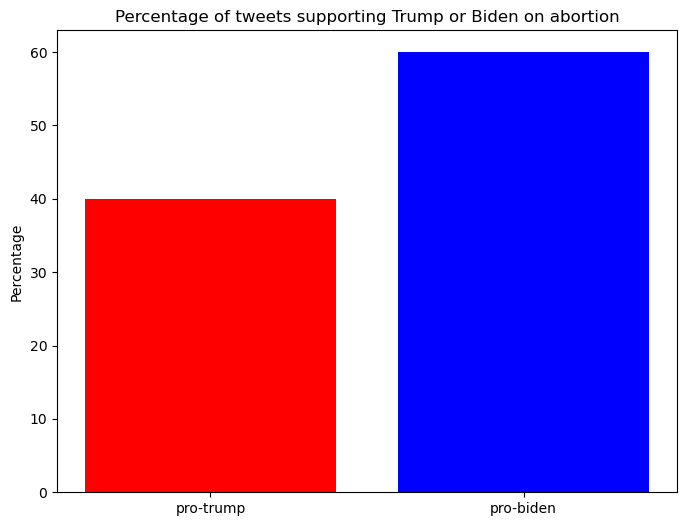

In [119]:
# Calculate median prediction
median_prediction = abortion_df['predictions'].median()

# Calculate percentage of prediction scores below and above the median
below_median_percentage = (abortion_df[abortion_df['predictions'] < median_prediction].shape[0] / abortion_df.shape[0]) * 100
above_median_percentage = (abortion_df[abortion_df['predictions'] >= median_prediction].shape[0] / abortion_df.shape[0]) * 100

# Create histogram
plt.figure(figsize=(8, 6))

# Plotting bars
plt.bar(['pro-trump', 'pro-biden'], [below_median_percentage, above_median_percentage], color=['red', 'blue'])

# Add labels and title
plt.ylabel('Percentage')
plt.title('Percentage of tweets supporting Trump or Biden on abortion')

# Show plot
plt.show()

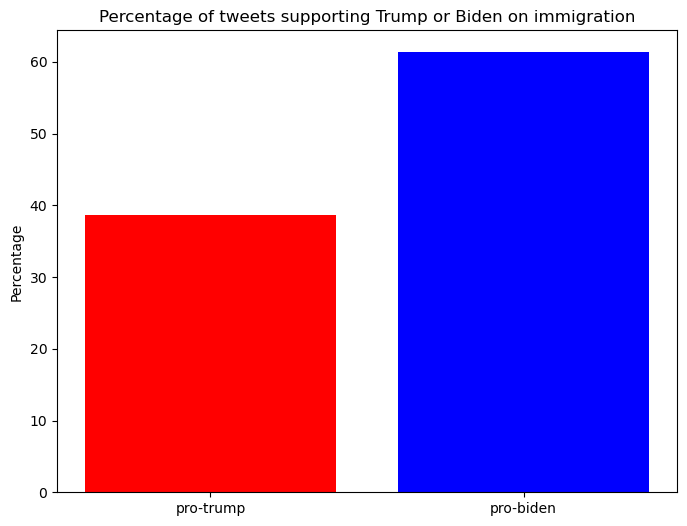

In [122]:
# Calculate median prediction
median_prediction = immigration_df['predictions'].median()

# Calculate percentage of prediction scores below and above the median
below_median_percentage = (immigration_df[immigration_df['predictions'] < median_prediction].shape[0] / immigration_df.shape[0]) * 100
above_median_percentage = (immigration_df[immigration_df['predictions'] >= median_prediction].shape[0] / immigration_df.shape[0]) * 100

# Create histogram
plt.figure(figsize=(8, 6))

# Plotting bars
plt.bar(['pro-trump', 'pro-biden'], [below_median_percentage, above_median_percentage], color=['red', 'blue'])

# Add labels and title
plt.ylabel('Percentage')
plt.title('Percentage of tweets supporting Trump or Biden on immigration')

# Show plot
plt.show()

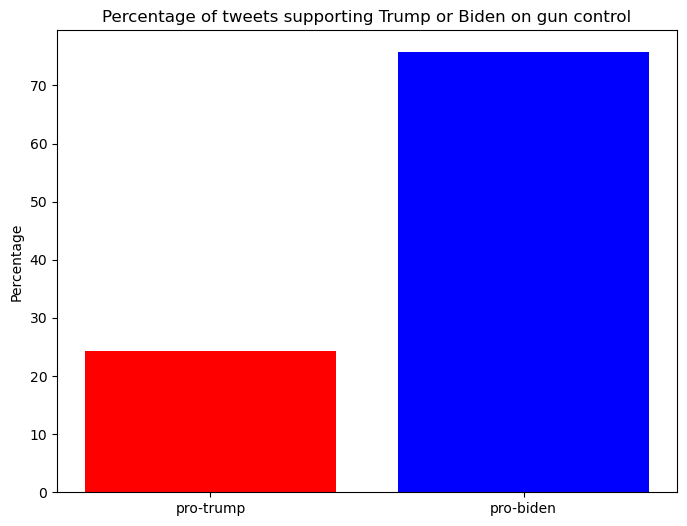

In [123]:
# Calculate median prediction
median_prediction = gun_df['predictions'].median()

# Calculate percentage of prediction scores below and above the median
below_median_percentage = (gun_df[gun_df['predictions'] < median_prediction].shape[0] / gun_df.shape[0]) * 100
above_median_percentage = (gun_df[gun_df['predictions'] >= median_prediction].shape[0] / gun_df.shape[0]) * 100

# Create histogram
plt.figure(figsize=(8, 6))

# Plotting bars
plt.bar(['pro-trump', 'pro-biden'], [below_median_percentage, above_median_percentage], color=['red', 'blue'])

# Add labels and title
plt.ylabel('Percentage')
plt.title('Percentage of tweets supporting Trump or Biden on gun control')

# Show plot
plt.show()